In [1]:
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns      

import warnings
warnings.filterwarnings('ignore')

import matplotlib.font_manager as fm
import platform


plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 깨짐 방지

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./data/predictions_with_cluster_id_without 1.csv')
print(df.shape)
display(df.head(10))
display(df.info())
display(df.describe())

(8132184, 15)


,player_name,total_games,avg_player_assists,avg_player_dbno,avg_player_dist_ride,avg_player_dist_walk,avg_player_dmg,avg_player_kills,avg_player_survive_time,avg_team_placement,time,victim_placement,victim_position_x,victim_position_y,cluster_id
0,King_WZRD,103,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.108660,24.553398,311,24.0,170249.0,626338.9,7
1,King_WZRD,103,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.108660,24.553398,341,36.0,180509.3,224658.2,18
2,King_WZRD,103,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.108660,24.553398,161,22.0,364223.5,408170.0,0
3,King_WZRD,103,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.108660,24.553398,230,25.0,368118.4,399377.9,0
4,King_WZRD,103,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.108660,24.553398,403,36.0,361662.8,405057.3,13
5,King_WZRD,103,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.108660,24.553398,329,70.0,358542.8,410803.2,0
6,King_WZRD,103,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.108660,24.553398,128,17.0,600804.3,479004.9,1
7,King_WZRD,103,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.108660,24.553398,363,30.0,364309.1,407091.8,13
8,King_WZRD,103,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.108660,24.553398,318,33.0,711104.9,332939.0,31
9,EXID_Hanii,40,0.32500,0.400000,928.785459,903.996532,117.000000,0.925000,631.711225,27.800000,148,22.0,436802.4,636505.3,22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8132184 entries, 0 to 8132183
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   player_name              object 
 1   total_games              int64  
 2   avg_player_assists       float64
 3   avg_player_dbno          float64
 4   avg_player_dist_ride     float64
 5   avg_player_dist_walk     float64
 6   avg_player_dmg           float64
 7   avg_player_kills         float64
 8   avg_player_survive_time  float64
 9   avg_team_placement       float64
 10  time                     int64  
 11  victim_placement         float64
 12  victim_position_x        float64
 13  victim_position_y        float64
 14  cluster_id               int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 930.7+ MB


None

,total_games,avg_player_assists,avg_player_dbno,avg_player_dist_ride,avg_player_dist_walk,avg_player_dmg,avg_player_kills,avg_player_survive_time,avg_team_placement,time,victim_placement,victim_position_x,victim_position_y,cluster_id
count,8.132184e+06,8.132184e+06,8.132184e+06,8.132184e+06,8.132184e+06,8.132184e+06,8.132184e+06,8.132184e+06,8.132184e+06,8.132184e+06,8.036450e+06,8.132184e+06,8.132184e+06,8.132184e+06
mean,9.530521e+01,2.274104e-01,5.784446e-01,1.090140e+03,1.120071e+03,1.256090e+02,9.030003e-01,7.295404e+02,2.679738e+01,2.195697e+02,3.944318e+01,4.152703e+05,3.986769e+05,1.598672e+01
std,8.027665e+01,1.266082e-01,3.692705e-01,4.968063e+02,2.688759e+02,5.709706e+01,4.817835e-01,1.426236e+02,9.405479e+00,9.137950e+01,2.248273e+01,1.547389e+05,1.588510e+05,1.241051e+01
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.729140e+02,2.360825e+00,5.000000e+01,1.000000e+00,-1.593097e+04,0.000000e+00,0.000000e+00
25%,4.900000e+01,1.379310e-01,3.272727e-01,7.471251e+02,9.361574e+02,8.663077e+01,5.750000e-01,6.316316e+02,1.995652e+01,1.420000e+02,2.300000e+01,3.589449e+05,2.945935e+05,4.000000e+00
50%,7.100000e+01,2.075472e-01,5.177305e-01,1.015087e+03,1.105605e+03,1.154286e+02,8.114478e-01,7.230809e+02,2.484722e+01,2.020000e+02,3.300000e+01,4.224803e+05,3.788843e+05,1.400000e+01
75%,1.120000e+02,2.933333e-01,7.586207e-01,1.345321e+03,1.288090e+03,1.531622e+02,1.125000e+00,8.195587e+02,3.161364e+01,2.890000e+02,4.900000e+01,5.289804e+05,5.148360e+05,2.600000e+01
max,1.433000e+03,2.216216e+00,9.312500e+00,7.680553e+03,3.063052e+03,1.413656e+03,1.265625e+01,1.705468e+03,9.230357e+01,4.200000e+02,1.000000e+02,8.107416e+05,8.177087e+05,3.800000e+01


In [7]:
df['cluster_id'].value_counts().sort_index()

cluster_id
0     513663
1     205064
2     661916
3     191354
4     585193
5      48691
6     498496
7     142791
8     354820
9      15509
10     29449
11     43281
12    213761
13    390148
14    382040
15    174044
16    188312
17    256125
18    245660
19     37614
20    191538
21    111326
22    311693
23     28610
24    164366
25     41388
26    133810
27    157037
28    138059
29     41202
30     94022
31    107586
32    133375
33    165177
34     75788
35     80168
36    129752
37    166285
38    683071
Name: count, dtype: int64

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# 조기탈락 라벨 생성: time <= 180 → 1, else → 0
df['early_dropout'] = (df['time'] <= 180).astype(int)

# 사용할 feature 컬럼 정의
exclude_cols = ['player_name', 'total_games', 'victim_placement', 'victim_position_x', 'victim_position_y', 'time']
feature_cols = [col for col in df.columns if col not in exclude_cols + ['early_dropout']]

# X, y 정의
X = df[feature_cols]
y = df['early_dropout']

# 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 정의 및 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 예측 및 확률 출력
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)  # 확률 출력: [:, 0]은 클래스 0, [:, 1]은 클래스 1

# 결과 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba[:, 1]))

# 예측 결과와 확률을 함께 보기
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Prob_Class_0': y_proba[:, 0],
    'Prob_Class_1': y_proba[:, 1]
})
display(results.head(10))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75    944813
           1       0.68      0.46      0.55    681624

    accuracy                           0.68   1626437
   macro avg       0.68      0.65      0.65   1626437
weighted avg       0.68      0.68      0.67   1626437

ROC AUC Score: 0.7175003247753049


,True Label,Predicted Label,Prob_Class_0,Prob_Class_1
688599,1,0,0.531056,0.468944
6936661,1,1,0.261660,0.738340
2472320,0,0,0.664823,0.335177
3115675,1,1,0.132476,0.867524
1119848,1,1,0.194893,0.805107
5703461,0,0,0.611017,0.388983
2604209,0,0,0.675063,0.324937
6313257,0,0,0.533692,0.466308
6025553,1,0,0.777097,0.222903
6904523,0,0,0.768207,0.231793


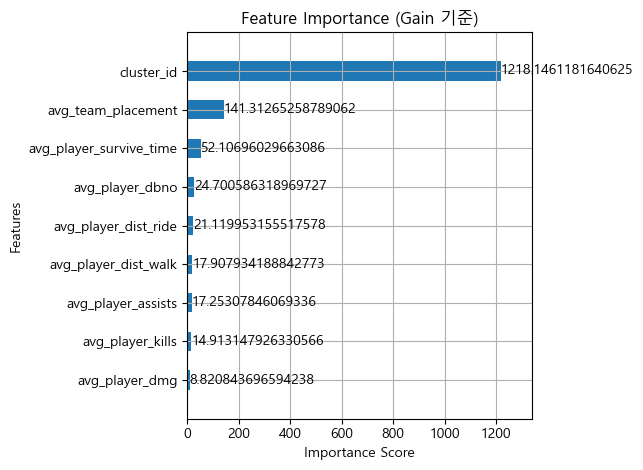

In [10]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 중요도 계산 및 시각화
xgb.plot_importance(model, 
                    importance_type='gain',  # 'weight', 'gain', 'cover' 중 선택 가능
                    max_num_features=15,     # 상위 15개 특성만 표시
                    height=0.5,
                    title='Feature Importance (Gain 기준)',
                    xlabel='Importance Score',
                    ylabel='Features')

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import class_weight
import optuna

# ------------------------------------------
# 데이터 준비
# ------------------------------------------
df['early_dropout'] = (df['time'] <= 180).astype(int)

exclude_cols = ['player_name', 'total_games', 'victim_placement', 'victim_position_x', 'victim_position_y', 'time']
feature_cols = [col for col in df.columns if col not in exclude_cols + ['early_dropout']]

X = df[feature_cols]
y = df['early_dropout']

# 클래스 불균형 가중치 계산
w = class_weight.compute_sample_weight('balanced', y)

# 학습/검증 분리
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------
# Optuna 하이퍼파라미터 튜닝 (roc_auc 기준)
# ------------------------------------------
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    aucs = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        w_tr = w_train[train_idx] if isinstance(w_train, np.ndarray) else w_train.iloc[train_idx]

        model.fit(X_tr, y_tr, sample_weight=w_tr)
        y_val_pred = model.predict_proba(X_val)[:, 1]
        aucs.append(roc_auc_score(y_val, y_val_pred))

    return np.mean(aucs)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best trial params:", study.best_trial.params)

# ------------------------------------------
# 최적 하이퍼파라미터로 최종 모델 학습
# ------------------------------------------
best_params = study.best_trial.params
final_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train, y_train, sample_weight=w_train)

# ------------------------------------------
# 예측 및 평가
# ------------------------------------------
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ------------------------------------------
# 예측 결과 확인
# ------------------------------------------
results = pd.DataFrame({
    'True Label': y_test.reset_index(drop=True),
    'Predicted Label': y_pred,
    'Prob_Class_1': y_proba
})
display(results.head(10))

[I 2025-10-14 11:39:48,375] A new study created in memory with name: no-name-ad76e2fc-25de-493e-804b-134cfd1680b1


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-14 11:42:13,350] Trial 0 finished with value: 0.7118795923793894 and parameters: {'n_estimators': 465, 'max_depth': 3, 'learning_rate': 0.023772531978427477, 'subsample': 0.9683034431401355, 'colsample_bytree': 0.8469969579203909, 'gamma': 0.8757838858479144, 'reg_alpha': 0.2924018661608341, 'reg_lambda': 1.5567360171051614}. Best is trial 0 with value: 0.7118795923793894.
[I 2025-10-14 11:44:24,886] Trial 1 finished with value: 0.7158263741125861 and parameters: {'n_estimators': 279, 'max_depth': 8, 'learning_rate': 0.011935455807485286, 'subsample': 0.870244687438006, 'colsample_bytree': 0.882940945212487, 'gamma': 3.1049001733623656, 'reg_alpha': 3.309110983094983, 'reg_lambda': 0.6568874816185821}. Best is trial 1 with value: 0.7158263741125861.
[I 2025-10-14 11:45:30,751] Trial 2 finished with value: 0.7159657204751574 and parameters: {'n_estimators': 210, 'max_depth': 3, 'learning_rate': 0.16967206120479422, 'subsample': 0.6076764706267032, 'colsample_bytree': 0.778350

,True Label,Predicted Label,Prob_Class_1
0,0,0,0.249806
1,1,1,0.633067
2,1,1,0.564230
3,0,1,0.536739
4,0,0,0.429737
5,0,0,0.494257
6,0,1,0.891560
7,1,1,0.729996
8,0,0,0.302004
9,0,0,0.260013


In [14]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

# ==================================================
# 모델 저장
# ==================================================
model_path = "2nd_xgb_model.joblib"
joblib.dump(final_model, model_path)
print(f"모델이 '{model_path}'로 저장되었습니다.")

# ==================================================
# 모델 불러오기
# ==================================================
loaded_model = joblib.load(model_path)
print("모델 로드 완료!")

# ==================================================
# 로드된 모델로 예측 테스트
# ==================================================
y_pred_loaded = loaded_model.predict(X_test)
y_proba_loaded = loaded_model.predict_proba(X_test)[:, 1]

# ==================================================
# 평가 및 검증
# ==================================================
print("\n [불러온 모델 성능 검증]")
print(classification_report(y_test, y_pred_loaded))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_loaded):.4f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_loaded, average='weighted'):.4f}")

# ==================================================
# 결과 일부 확인
# ==================================================
results_loaded = pd.DataFrame({
    'True Label': y_test.reset_index(drop=True),
    'Predicted Label': y_pred_loaded,
    'Prob_Class_1': y_proba_loaded
})
display(results_loaded.head(10))

모델이 '2nd_xgb_model.joblib'로 저장되었습니다.
모델 로드 완료!

 [불러온 모델 성능 검증]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72    945179
           1       0.61      0.60      0.60    681258

    accuracy                           0.67   1626437
   macro avg       0.66      0.66      0.66   1626437
weighted avg       0.67      0.67      0.67   1626437

ROC AUC Score: 0.7186
Weighted F1 Score: 0.6715


,True Label,Predicted Label,Prob_Class_1
0,0,0,0.249806
1,1,1,0.633067
2,1,1,0.564230
3,0,1,0.536739
4,0,0,0.429737
5,0,0,0.494257
6,0,1,0.891560
7,1,1,0.729996
8,0,0,0.302004
9,0,0,0.260013


In [ ]:
# 데이터 새로 저장
display(X.head())
display(y.head())

,avg_player_assists,avg_player_dbno,avg_player_dist_ride,avg_player_dist_walk,avg_player_dmg,avg_player_kills,avg_player_survive_time,avg_team_placement,cluster_id
0,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.10866,24.553398,7
1,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.10866,24.553398,18
2,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.10866,24.553398,0
3,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.10866,24.553398,0
4,0.23301,0.796117,1345.951473,1085.605221,199.456311,1.456311,802.10866,24.553398,13


0    0
1    0
2    1
3    0
4    0
Name: early_dropout, dtype: int64

In [18]:
# 데이터 새로 저장
X.to_csv('data/early_dropout_prediction_data.csv', index=False, encoding='utf-8-sig')
print("X 데이터프레임이 'early_dropout_prediction_data.csv'로 저장되었습니다.")

X 데이터프레임이 'early_dropout_prediction_data.csv'로 저장되었습니다.
